<a href="https://colab.research.google.com/github/NeerajHazarika/ENITS_DataMining_WS24/blob/main/Week_6/Lab_FraudDetection_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab: Credit Card Fraud Detection Part II

We used clustering last week to identify different groups of users. Now we want to detect cases of fraud.

## Task: automatically detect transactions that are likely to be frauds  

The Data for this assignment is fron the following  Kaggle challenge: https://www.kaggle.com/mlg-ulb/creditcardfraud

### Problem description
**Context**
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Data
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 126 (delta 11), reused 39 (delta 11), pack-reused 87 (from 1)
Receiving objects: 100% (126/126), 185.56 MiB | 9.23 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (86/86), done.


In [2]:
!unzip DATA/creditcard.csv.zip

Archive:  DATA/creditcard.csv.zip
  inflating: creditcard.csv          


In [3]:
import pandas as pd
data = pd.read_csv("creditcard.csv")

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Task 1: Wrangling + Pre-Processing
* Use the pre-processing from last week

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(['Class', 'Time', 'V1', 'Amount'], axis=1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Convert to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

### Task2: Train  Other Classifiers
* Train and evaluate  [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and [simple Neural Networks](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
    * HINT: check for options in the API to support training of unbalanced data
   
* Compare the results using [F1-Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) and a [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)




In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
def evaluate_model(y_true, y_pred, model_name):
  f1 = f1_score(y_true, y_pred)
  print(f"{model_name} F1-score: {f1}")

  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f"{model_name} Confusion Matrix")
  plt.show()

In [9]:
rf_classifier = RandomForestClassifier(class_weight='balanced') # Handle class imbalance
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [10]:
nn_classifier = MLPClassifier(hidden_layer_sizes=(10,), max_iter=500) # Simple architecture
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)

Random Forest F1-score: 0.8516129032258064


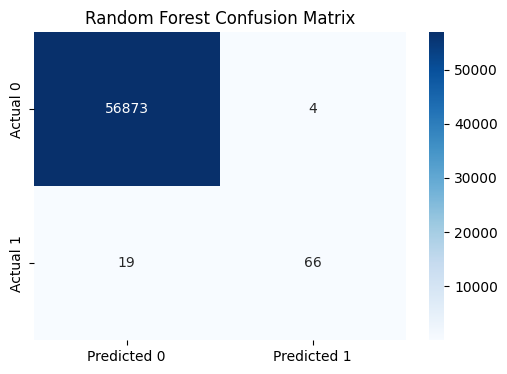

In [11]:
evaluate_model(y_test, rf_predictions, "Random Forest")

Neural Network F1-score: 0.8407643312101911


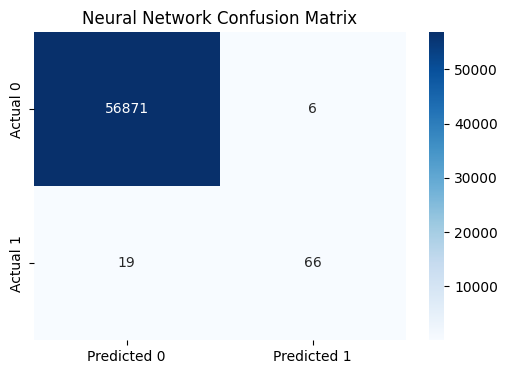

In [12]:
evaluate_model(y_test, nn_predictions, "Neural Network")